### Logistic Regression
Linear regression is useful to predict the value which is continuous. Ex: Home prices, weather, stock price .
When we want to predict ‘Yes’ or ‘No’ values, then we cannot use Liner regression. We need Logistic regression. 
### Logistic regression is useful to predict the value which is categorical. 
Ex:1.Email is spam or not 
   2.Will customer buy life insurance or not 
   3.Which party a person is going to vote for a. democratic, b. republican, c. independent 
### Logistic regression is one of the techniques for classification. We use this when we have to predict from the available categories or classes.

### Classification types
#### When we have only 2 possibilities like ‘Yes’ or ‘No’, then it is called Binary classification. 
Ex: Will customer buy life insurance? 1. Yes, 2. No.
#### When we have more than 2 possibilities, then it is called Multiclass classification.
Ex: Which party a person is going to vote for? 1. Democratic, 2. Republican, 3. Independent

sigmoid function=1/(1+e^-z)
e-Euler's number~2.171828
If we observe the above formula, we can see that it is 1 divided by something. Hence its maximum value can be upto 1 only. Sigmoid function converts input into range 0 to 1. In logistic regression, we are converting the straight line of Linear regression into S shaped line as shown below:
Note:y=mx+b
y=1/(1+e^(-mx+b))

In [14]:
# logistic regression 
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("Desktop/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df['sales'].unique() 

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Label Encoding

In [20]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['sales']= label_encoder.fit_transform(df['sales']) 
df['salary']= label_encoder.fit_transform(df['salary'])  
df['sales'].unique()
df['salary'].unique()

array([1, 2, 0], dtype=int64)

### OneHot Encoding

In [21]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
onehotencoder = OneHotEncoder(categorical_features = [0]) 
df = onehotencoder.fit_transform(df).toarray() 

C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [26]:
data=pd.DataFrame(df)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.53,2.0,157.0,3.0,0.0,1.0,0.0,7.0,1.0
1,1.0,0.0,0.86,5.0,262.0,6.0,0.0,1.0,0.0,7.0,2.0
2,1.0,0.0,0.88,7.0,272.0,4.0,0.0,1.0,0.0,7.0,2.0
3,1.0,0.0,0.87,5.0,223.0,5.0,0.0,1.0,0.0,7.0,1.0
4,1.0,0.0,0.52,2.0,159.0,3.0,0.0,1.0,0.0,7.0,1.0


In [27]:
#retrieve the data 
x = data.iloc[:, :-1].values
x# retrieve only 0th column x

array([[1.  , 0.  , 0.53, ..., 1.  , 0.  , 7.  ],
       [1.  , 0.  , 0.86, ..., 1.  , 0.  , 7.  ],
       [1.  , 0.  , 0.88, ..., 1.  , 0.  , 7.  ],
       ...,
       [1.  , 0.  , 0.53, ..., 1.  , 0.  , 8.  ],
       [1.  , 0.  , 0.96, ..., 1.  , 0.  , 8.  ],
       [1.  , 0.  , 0.52, ..., 1.  , 0.  , 8.  ]])

In [28]:
y = data.iloc[:, 1].values
y
# retrieve 1st column

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
type(x)


numpy.ndarray

ValueError: x and y must be the same size

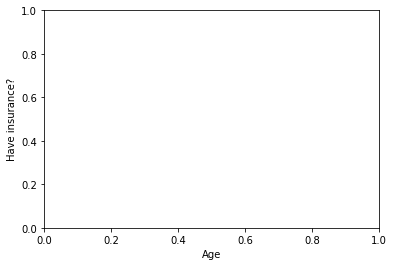

In [38]:
# display the scatter plot to know how the datapoints are aligned 
plt.xlabel('Age')
plt.ylabel('Have insurance?')
plt.scatter(x,y, marker='d', color='red')

In [32]:
# split data for training and testing 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1) # see the test results x_test

In [33]:
# create logistic regression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# predict the test results 
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
# accuracy in 2 ways
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 1.0 perfect 
model.score(x_test, y_test) # 1.0

1.0